# Exploratory Data Analysis on the Olympic Games Data

#### Author: Ruth Kristianingsih

## Introduction

The Olympic Games is the world's foremost sports competition with more than 200 nations participating. Thousands of athletes from around the world participate in a variety of competitions and the Olympics is undoubtedly a fantastic international proving ground for athletes. It gives athletes the opportunity to compete against others of a similar level on the international stage. Considering the prestige of this competition, any information and good data visualiation of the games is highly demanding. Given the Olympic Games data collected from the first Event in 1896 until 2016, we can analyse the data to understand thoroughly and obtain meaningful insight about the data.

### Purpose

According to the background above, a brief analysis on the Olympics games data will be done. This report will show the process of visualisation and transformation to explore the Olympics games data in a systematic way to develop an understanding of the data. 

### Methods

In order to achiver the goal stated above, several steps of Exploratory Data Analysis (EDA) will be done:

1. Getting the data and brief summary of the data

2. Investigate the variation of the data
    - Getting the data and explore the stastical summary
    - Visualizing distribution
    
3. Investigate the covariation of the data
    - All years Olympics in General
        - Country participants
        - Female Athletes in the Olympics Games
        - Number of sports every year in the Olympics Games
       
    - Some Countries
        - With the highest number of participants
        - With the highest number of medals

4. Patterns and models (further analysis)
  

## Getting the data and brief summary of the data

### Packages and options

In [1]:
# Numerical packages
import numpy as np
import pandas as pd
from math import pi
# Plotting packages
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns
# Modelling packages
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Set plotnine/ggplot global theme
theme_set(theme_light())

In [3]:
# Ignore warnings (to export to HTML)
import warnings
warnings.filterwarnings("ignore")

### Import dataset

To start the analysis, we will import the Olympic Games data. Then we will 

- Explore the datatypes of the different variables.
- Get a brief statistical analysis of the numerical variables, and a summary of the 'object'/categorical variables.

In [4]:
# Import datasets
df_all = pd.read_csv('data/athlete_events.csv')

#### Data types

In [5]:
# Get information about all column-entries 
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


#### Stastical summary

In [6]:
# Get statistical summary of numerical variables
df_all.describe(include = [np.number])

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
# Get statistical summary of 'object' variables
df_all.describe(include = 'O')

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


## Variation analysis

### Categorical data

In the following section, we will explore the variation of some categorical data. 

In [8]:
# Get the dataframe and remove duplicates
df_sex_athletes = (df_all 
    .filter(["ID", "Sex"])
    .drop_duplicates()
)

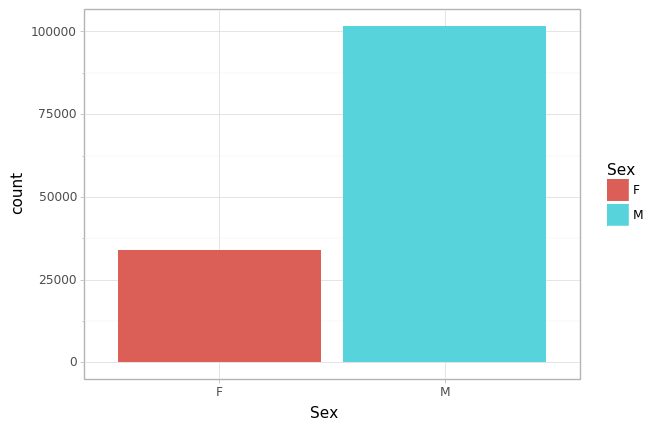

<ggplot: (7548595865)>

In [9]:
# Plot the distibution of female and male athletes in the Olympics Games
(ggplot(df_sex_athletes) +
    geom_bar(mapping = aes(x = "Sex", fill = "Sex"))
)

The figure above depicts that there is a huge different on the number of female and male athletes participated in the Olympics games. The total of female athletes are only roughly 30% of the total number of male athletes. 

In [10]:
# Get the data of number participants in every country
df_num_athletes = (
    df_all 
    .filter(["ID", "NOC"])
    .drop_duplicates()
)

In [11]:
df_num_athletes

,ID,NOC
0,1,CHN
1,2,CHN
2,3,DEN
3,4,DEN
4,5,NED
...,...,...
271108,135567,RUS
271110,135568,BLR
271111,135569,POL
271112,135570,POL


From [olympic.org](https://stillmed.olympic.org/media/Document%20Library/OlympicOrg/Documents/National-Olympic-Committees/List-of-National-Olympic-Committees-in-IOC-Protocol-Order.pdi) we created manually created a CSV from a PDF containing the information about all current National Olympic Committees. This will be useful to extract the continent of each NOC.

In [12]:
noc_list = pd.read_csv('data/list_national_olympic_committees.csv')

In [13]:
df_num_athletes = (
    pd.merge(df_num_athletes, noc_list.filter(["NOC", "Continent"]), how = "left", sort = True)
    .query('NOC != "IOA"')
)

In [14]:
df_num_athletes

,ID,NOC,Continent
0,502,AFG,Asia
1,1076,AFG,Asia
2,1101,AFG,Asia
3,1745,AFG,Asia
4,4628,AFG,Asia
...,...,...,...
137238,130453,ZIM,Africa
137239,130832,ZIM,Africa
137240,130880,ZIM,Africa
137241,131478,ZIM,Africa


In [15]:
# Getting the figure of number athletes participated in the Olympics games
fig_dist_NOC = (
    ggplot(df_num_athletes) +
    aes(x = "NOC", fill = "Continent") +
    geom_bar() +
    labs(x = "Country") +
    coord_flip() +
    theme(figure_size = (15, 15), panel_spacing_x = 0.45) +
    facet_wrap("Continent", scales = "free_y", shrink = False)
)

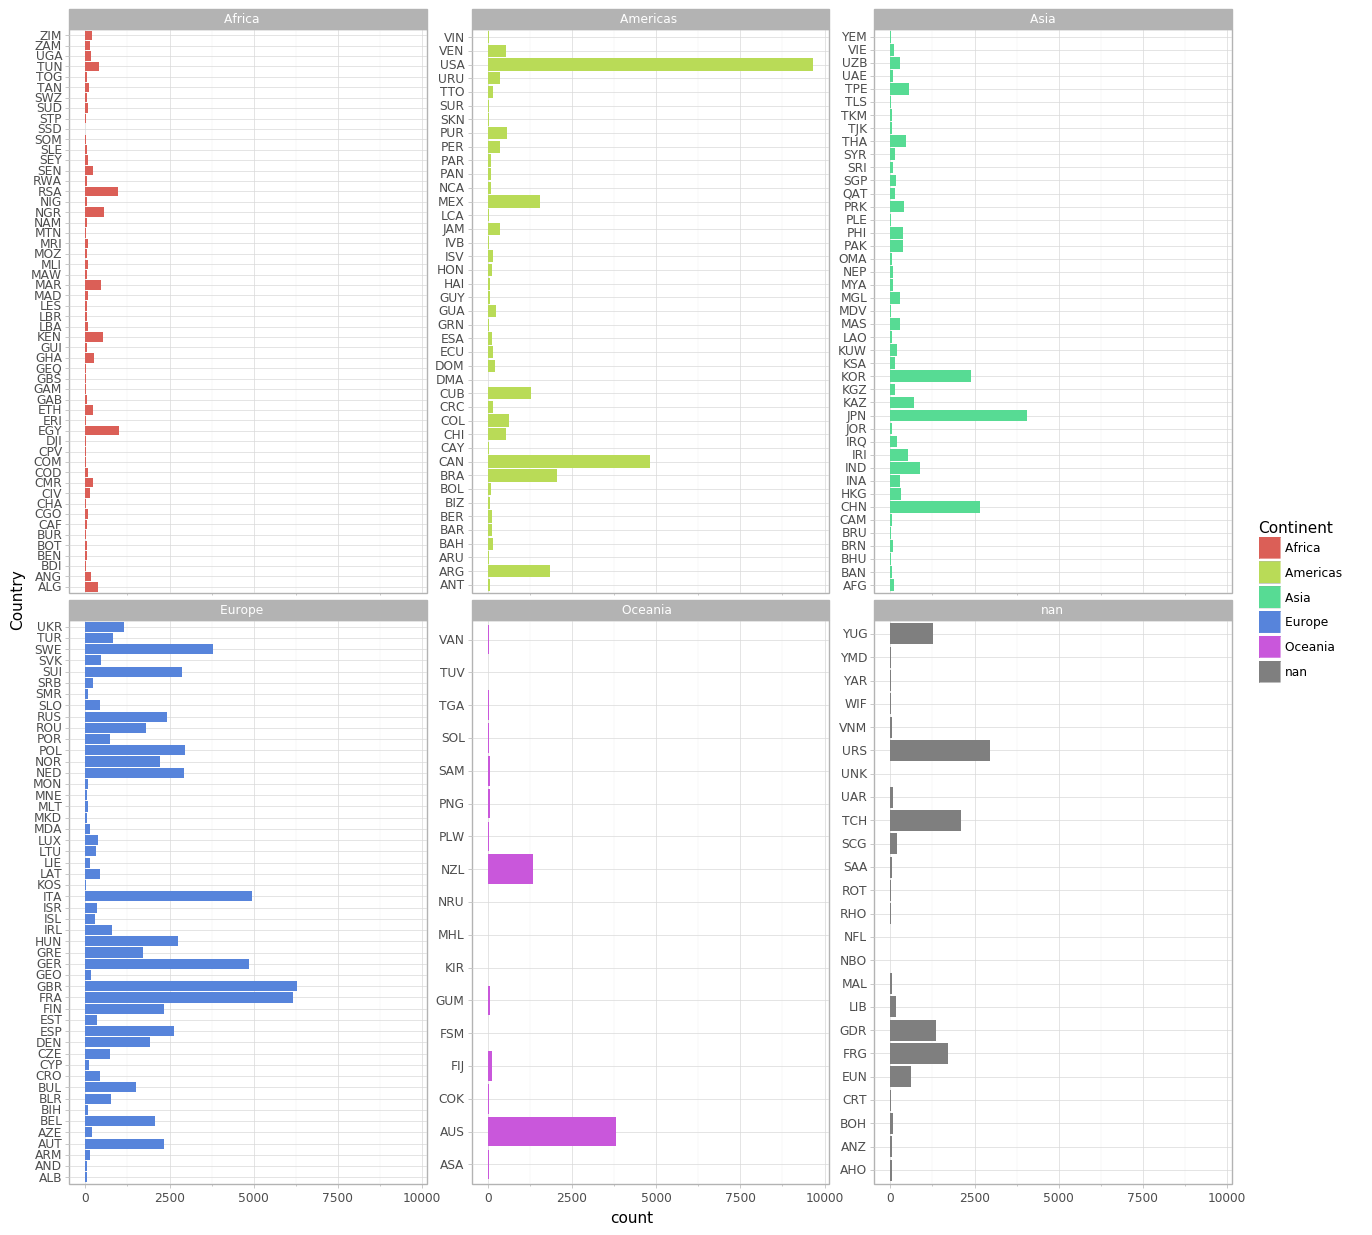

<ggplot: (278501349)>

In [16]:
fig_dist_NOC

The country with the highest number of participants in the Olympics games are the United States (`USA`), followed by the United Kingdom (`GBR`). An interesting thing to observe is that the Olympic Games are mostly dominated by Europe, the USA, Canada, Australia, Japan, China, and South Korea. 

Some NOC countries are not classified in any continent, as these are nations (e.g., the URS, Yugoslavia) that no longer exist today.

In [17]:
# Plot the number of participants in every season
fig_athletes_season = (
    ggplot(df_all) +
    aes(x = "Season", fill = "Season") +
    geom_bar() +
    theme(figure_size = (3, 6))
)

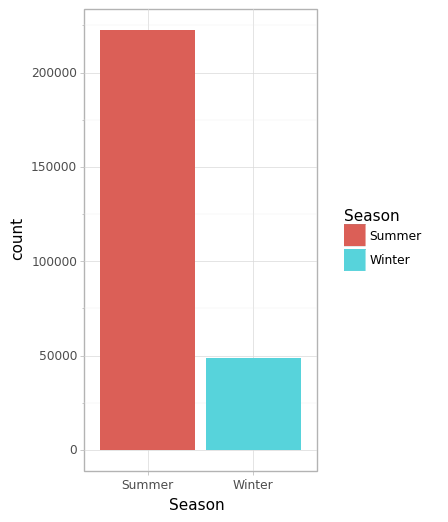

<ggplot: (7550865117)>

In [18]:
fig_athletes_season

Depending on the season when the Olympics is held, there are more participants on the summer Olympics games. 

In [19]:
# Plot the number of paticipants based on the sports 
fig_athletes_sports = (
    ggplot(df_all) +
    aes(x = "Sport") +
    geom_bar(fill = "mediumseagreen") +
    labs(y = "Count") +
    scale_y_continuous(breaks = np.arange(0, 50000, 5000)) +
    coord_flip() +
    theme(figure_size = (8, 20), panel_spacing_y = 0.45)
)

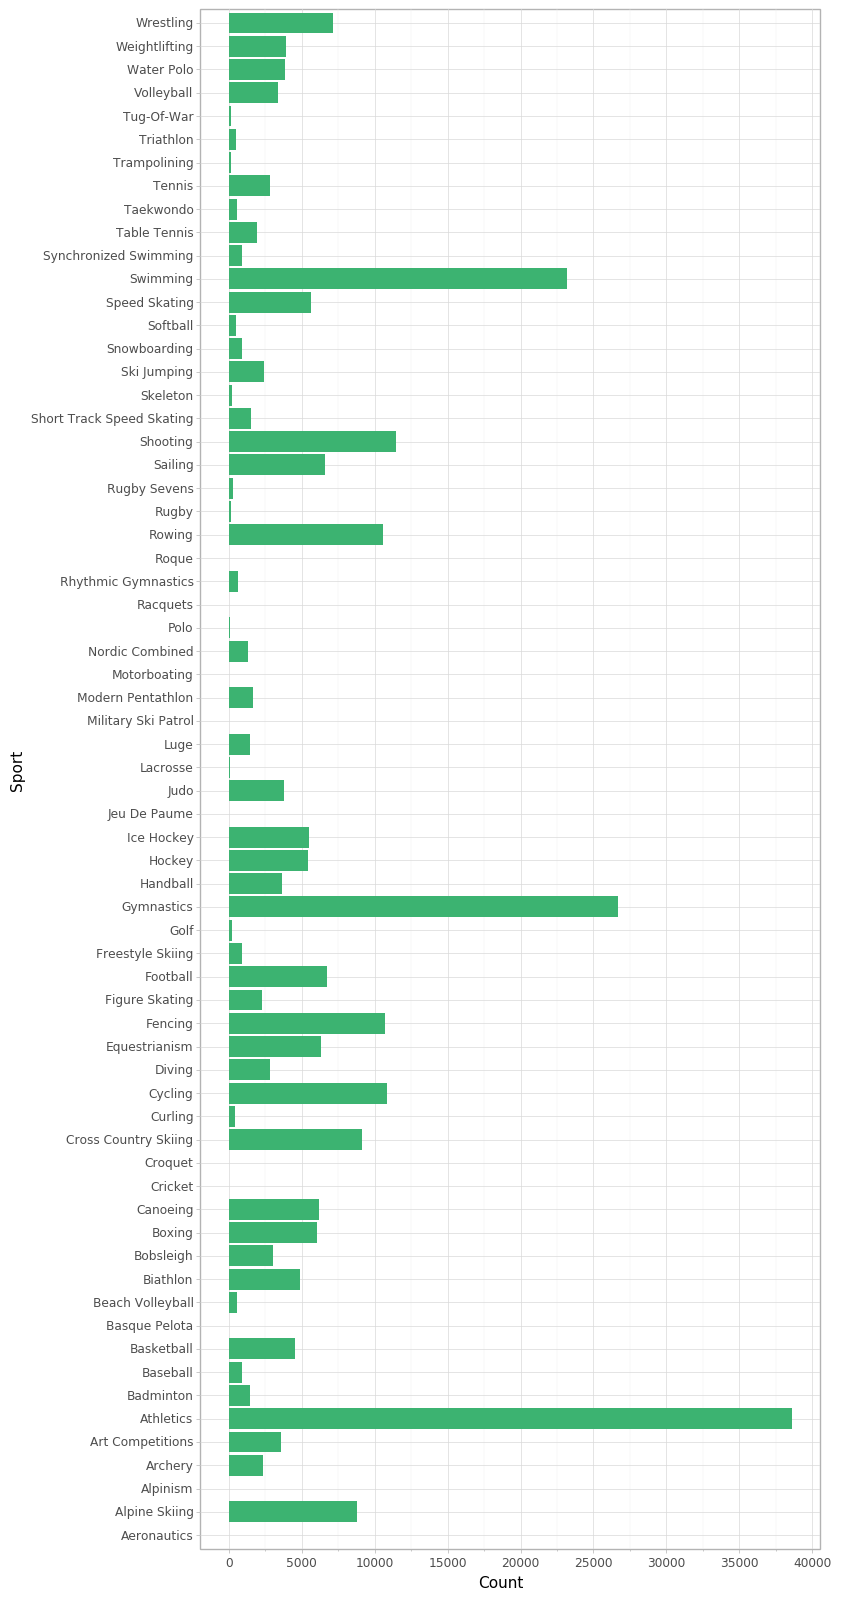

<ggplot: (7550889469)>

In [20]:
fig_athletes_sports

The sports with the first three highest participants are athletics, gymnastics, and swimming. 

Lastly, we can see how many gold, bronze, and silver medals have been awarded so far throughout the Olympic Games. 

In [21]:
# Plot medals won so far
fig_num_medals = (
    ggplot(df_all.dropna(subset=["Medal"])) +
    geom_bar(aes(x = "Medal", fill = "Medal")) +
    scale_y_continuous(breaks = np.arange(0,15000, 2500)) +
    scale_fill_manual(values = {"Bronze": "peru", "Gold": "gold", "Silver" : "silver"}) +
    theme(figure_size = (5, 6))
)

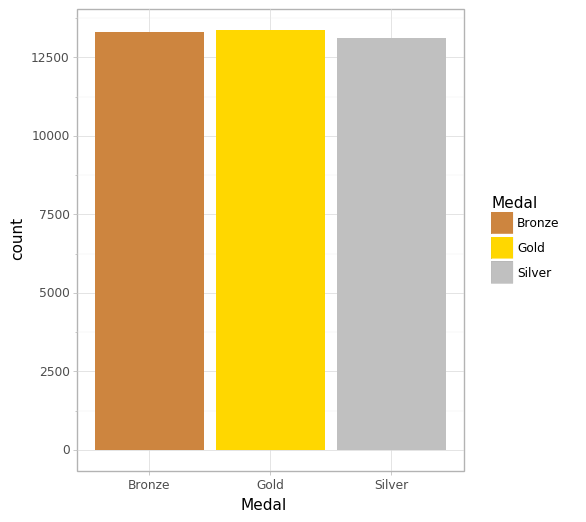

<ggplot: (7548650201)>

In [22]:
fig_num_medals

As expected, the total number of medals is essentially the same for each of the medal types, as for each event both three of them (Gold, Silver, Bronze) are awarded.

### Continuous data

In this section, we can see how continous variables of the data distributes. 

In [23]:
# Define a function to plot a histogram of continuous variable
def get_fig_continuos_data(df_main, var, bin_width = 0.25):
    # Get athletes' data  
    df_var = (df_main
        .filter(["ID", var, "Sex"])
        .drop_duplicates()
    )
    
    # Drop all NaN data in variable column
    df_var = df_var[np.isfinite(df_var[var])]
    
    # Make plot
    fig_var = (
        ggplot(df_var) +
        aes(x = var, color = "Sex") +
        scale_color_manual(values = {"F": "plum", "M": "skyblue"}, breaks = ("F", "M"), labels = ("Female", "Male")) +
        scale_x_continuous(breaks = np.arange(0, 300, 10)) +
        geom_freqpoly(binwidth = bin_width, alpha = 0.75, position = "identity")
    )
    
    return(fig_var + theme(figure_size = (10,5)))

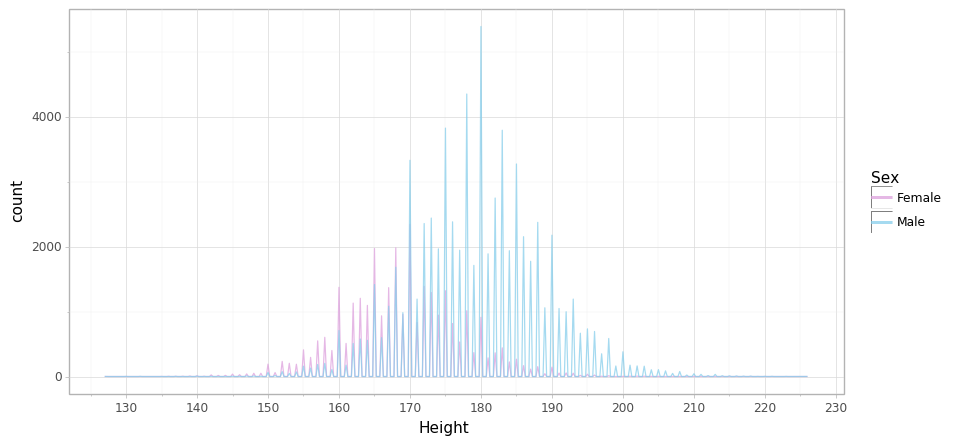

<ggplot: (7548781421)>

In [24]:
# Plot the disribution of participants' height
get_fig_continuos_data(df_all, "Height", 0.25)

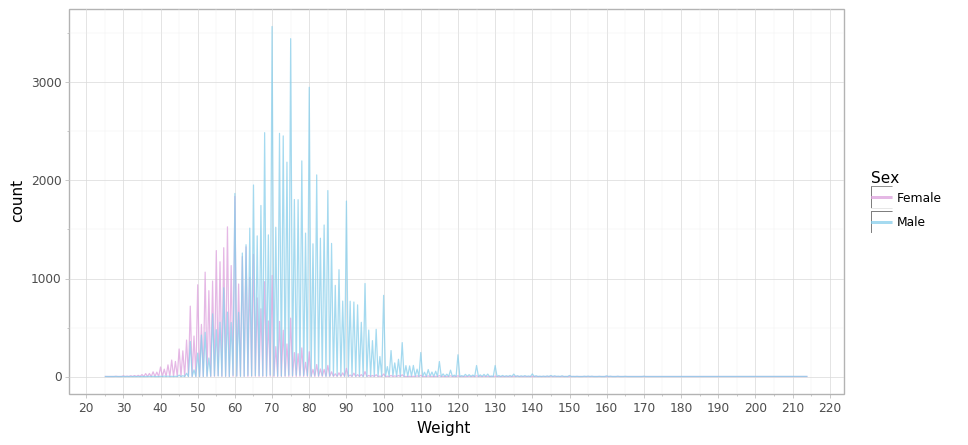

<ggplot: (7554643253)>

In [25]:
# Plot the disribution of participants' weight
get_fig_continuos_data(df_all, "Weight", 0.5)

According to the figures above, we can conclude that height of both female and male athletes follow the same distibution with different mean and variance (as we can see that the distribution of female athletes' height is swifted and lower). Similarly for the distribution for weight of both female and male athletes. 

Additionaly, the distribution of age of both female and male athelets are positive skewed distribution, with different standard deviation. 

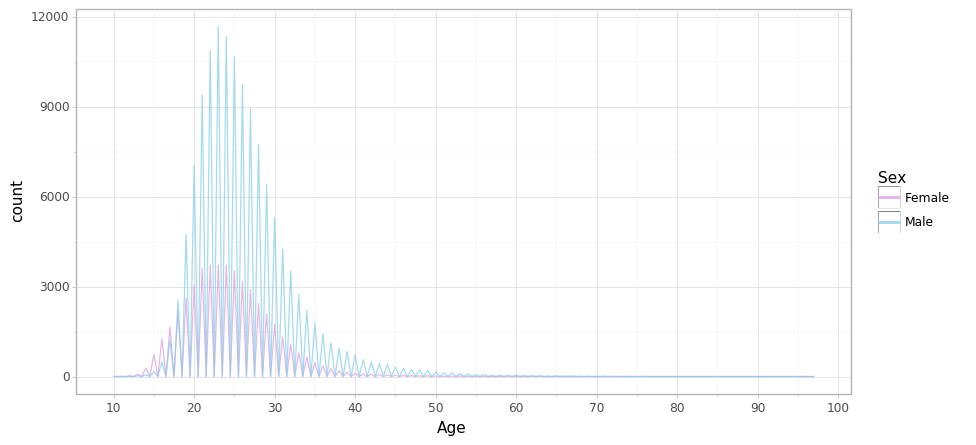

<ggplot: (7549477361)>

In [26]:
# Plot the disribution of participants' age
get_fig_continuos_data(df_all, "Age", 0.5)

After getting the information of the behavior within a variable, we can then analyse further the information about how the variable against other variables with covariation analysis. 
Covariation describes the behavior between variables. Covariation is the tendency for the values of two or more variables to vary together in a related way. The best way to spot covariation is to visualise the relationship between two or more variables. How you do that should again depend on the type of variables involved.

## Covariation analysis

### All years olympic in general

#### Number of participants

First of all, we want to see the total number of countries that participated in Olympics games all of the year from 1896 until 2016. Using the bar plot below, we can see the number of country participants for each winter and summer Olympics. 

In [27]:
def get_num_participants(df_main):
    num_participants = (df_main
        .filter(["Year", "NOC", "Season"])
        .drop_duplicates()
        .groupby(["Year", "Season"], as_index = False)
        .agg({"NOC": "count"})
    )
    
    return(num_participants)

In [28]:
# Summer Games
get_num_participants(df_all).query('Season == "Summer"')

,Year,Season,NOC
0,1896,Summer,12
1,1900,Summer,31
2,1904,Summer,15
3,1906,Summer,21
4,1908,Summer,22
5,1912,Summer,29
6,1920,Summer,29
7,1924,Summer,45
9,1928,Summer,46
11,1932,Summer,47


In [29]:
# Winter Games
get_num_participants(df_all).query('Season == "Winter"')

,Year,Season,NOC
8,1924,Winter,19
10,1928,Winter,25
12,1932,Winter,17
14,1936,Winter,28
16,1948,Winter,28
18,1952,Winter,30
20,1956,Winter,32
22,1960,Winter,30
24,1964,Winter,36
26,1968,Winter,37


In [30]:
def plot_num_participants(df_main):
    # Get number of participants
    num_participants = get_num_participants(df_main)
    
    fig = (
        ggplot(num_participants.astype({"Year": "category"})) +
            aes(x = "Year", y = "NOC", fill = "Season") +
            geom_col(position = "stack", width = 0.9) +
            geom_text(aes(label = "NOC"), nudge_y = 10) +
            theme(axis_text_x = element_text(angle = 45, hjust = 10)) +
            labs(y = "Number of countries") 
    )
    
    return(fig + theme(figure_size = (12, 8), panel_spacing_y = 0.45) + facet_wrap("Season", nrow = 2, scales = "free_x"))

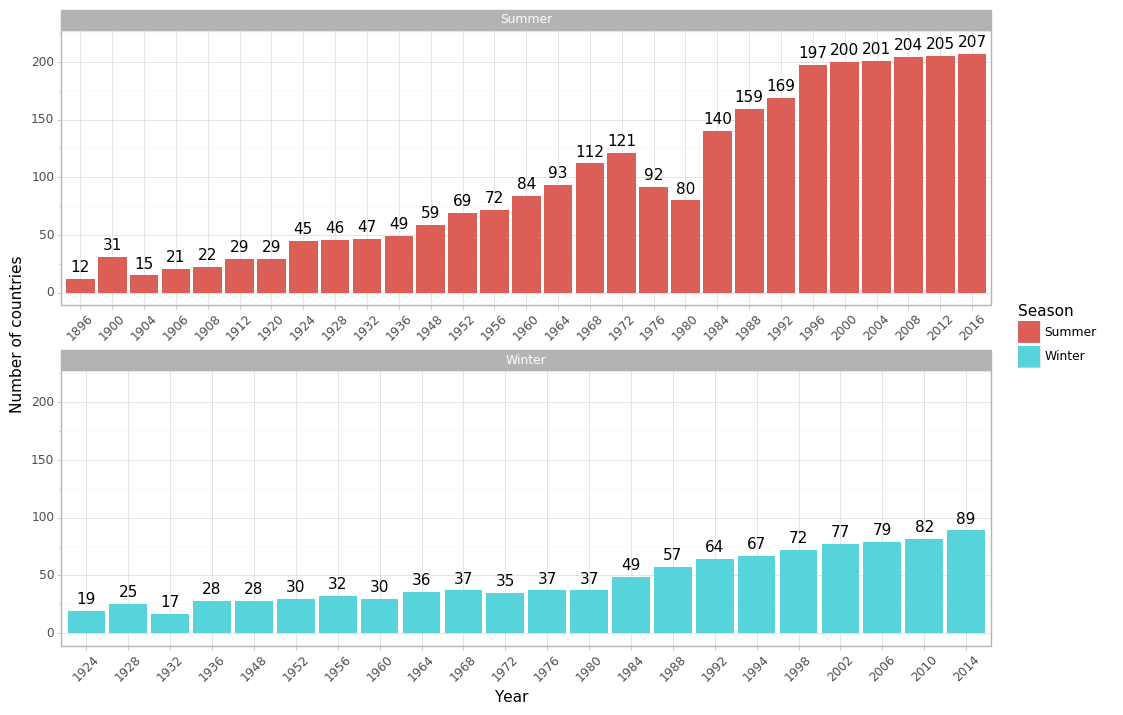

<ggplot: (7548598973)>

In [31]:
plot_num_participants(df_all)

As we can see above, the number of countries that participated to the Olympics games gradually increased every year, except in summer games in 1976 and 1980. The number of country participants decreased compared to the participants in 1972. However, for winter games, starting on winter game in 1980, we can see that the number of countries taken part in the Olympics games kept rising. 

#### Athletes' sex

For each country, they normally have female and male athletes. Let us observe the number of female athletes participate in the Olympics games for every year and we can compare the percentage between male and female athletes each year.

In [32]:
def get_athletes_sex(df_main):
    # Getting the dataframe of number of female and male athletes  
    num_athletes = (df_main
        .filter(["Year", "ID", "Sex"])
        .drop_duplicates()
        .groupby(["Year", "Sex"], as_index = False)
        .agg({"ID": "count"})
    )
    
    return(num_athletes)

In [33]:
get_athletes_sex(df_all).head(10)

,Year,Sex,ID
0,1896,M,176
1,1900,F,23
2,1900,M,1201
3,1904,F,6
4,1904,M,644
5,1906,F,6
6,1906,M,835
7,1908,F,44
8,1908,M,1980
9,1912,F,53


In [34]:
def plot_athletes_sex(df_main):
    num_athletes = get_athletes_sex(df_main)
    fig = (
        ggplot(num_athletes.astype({"Year": "category"})) +
            aes(x = "Year", y = "ID", fill = "Sex") +
            geom_col(position = position_fill(reverse = True), alpha = 0.5, width = 0.75) +
            scale_y_continuous(labels = lambda l: ["%d%%" % (v * 100) for v in l], 
                               breaks = np.linspace(0, 1, 11), expand = [0, 0.01, 0, 0.1]) +
            scale_fill_manual(values = {"F": "green", "M": "blue"}, breaks = ("F", "M"), labels = ("Female", "Male")) +
            geom_text(aes(label = "ID"), ha = "left", position = position_fill(reverse = True)) +
            labs(x = "Year", y = "Percentage of athletes") +
            coord_flip()
    )

    return(fig + theme(figure_size = (8,10)))

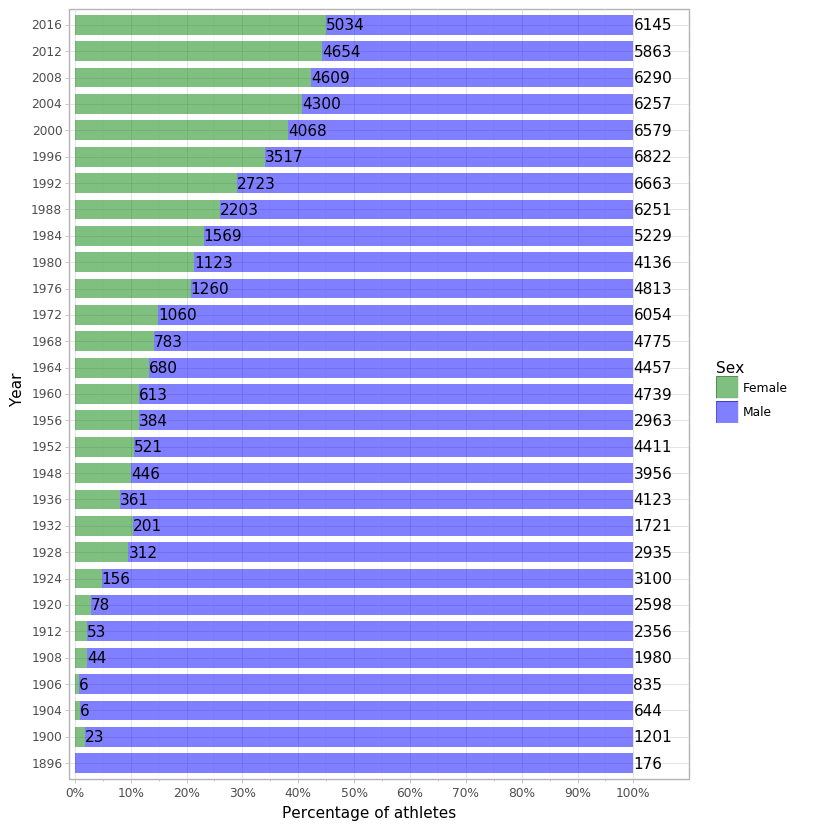

<ggplot: (7553585993)>

In [35]:
plot_athletes_sex(df_all.query('Season == "Summer"'))

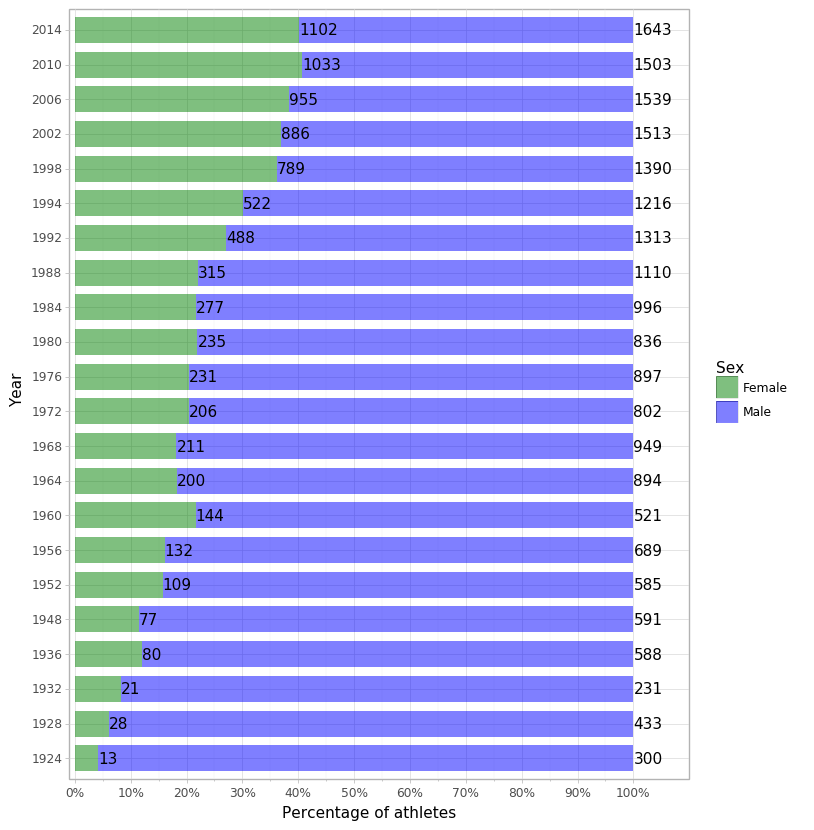

<ggplot: (7550555941)>

In [36]:
plot_athletes_sex(df_all.query('Season == "Winter"'))

The figures above depict how the percentage of female athletes compared to male athletes participated in the Olympics games for both Summer and Winter games has gotten  larger each year in general. Although in some years, for instance in 1936 Summer games (figure on the top), the percentage of female athletes is lower than in 1932, yet higher in number.

#### Number of sports

In [37]:
def get_num_sports(df_main):
    # Get number of sports all of the years in the Olympics games
    num_sports = (
        df_main
        .filter(["Year", "Sport", "Season"])
        .drop_duplicates()
        .groupby(["Year", "Season"], as_index = False )
        .agg({"Sport": "count"})
    )
    return(num_sports)

In [38]:
get_num_sports(df_all)

,Year,Season,Sport
0,1896,Summer,9
1,1900,Summer,20
2,1904,Summer,18
3,1906,Summer,13
4,1908,Summer,24
5,1912,Summer,17
6,1920,Summer,25
7,1924,Summer,20
8,1924,Winter,10
9,1928,Summer,17


In [39]:
def plot_num_sports(df_main):
    num_sports = get_num_sports(df_main)
    
    # Define the number of sports all years in the Olympics games 
    fig = (
        ggplot(num_sports) +
        aes(x = "Year", y = "Sport", fill = "Season") +
        geom_line(color = "grey") +
        scale_y_continuous(breaks = [0, 5, 10, 15, 20, 25, 30, 35, 40], limits = [0, None]) + 
        geom_point(color = "black", size = 5) +
        scale_fill_manual(values = {"Summer": "mediumaquamarine", "Winter": "cornflowerblue"})
    )
    
    return(fig + theme(figure_size = (15, 5), panel_spacing_y = 0.45) + facet_wrap("Season", scales = "free_x"))

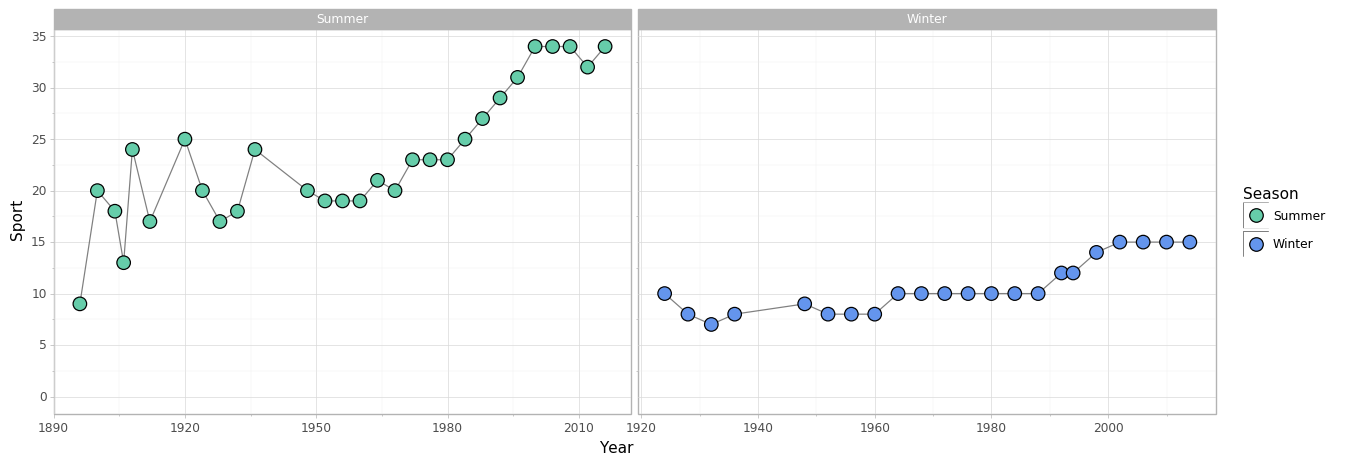

<ggplot: (7548741057)>

In [40]:
plot_num_sports(df_all)

It is obvious as we can see from the figures above that there are more sports in the Olympics game on summer game than winter game, since summer games have a bigger audience and can be practiced all year round, while winter sports are more niche.

### Information of each country

First of all, we need an auxiliary function for selecting an arbitrary number of top `N` countries by participant count. This function will be used in the plots of this section.

In [41]:
def get_top_n_countries_by_participants(df_main, top_n = 10):
    top_countries = (
        df_main
        .filter(["ID", "NOC"])
        .drop_duplicates()
        .groupby(["NOC"], as_index = False)
        .agg({"ID":"count"})
        .sort_values(by = 'ID', ascending = False)
        .head(top_n)
    )
    
    return(top_countries)

#### Number of participants

Before going further to the next step, we will see the top 10 countries with the highest medals in the Olympics games. 

In [42]:
def plot_num_participants(df_main, top_n = 10):
    # Create the figure for the countries with 10 highest participants 
    fig = (
        ggplot(get_top_n_countries_by_participants(df_all, top_n)) +
        aes(x = "NOC", y = "ID") +
        geom_segment(aes(xend = "NOC", y = 0, yend = "ID"), color = "skyblue") +
        geom_point(color = "blue", size = 4, alpha = 0.6) +
        labs(x = "Country", y = "Number of participants") +
        coord_flip()         
    )
    
    return(fig + theme_minimal() + theme(figure_size = (10, 4), panel_spacing_y = 0.45))

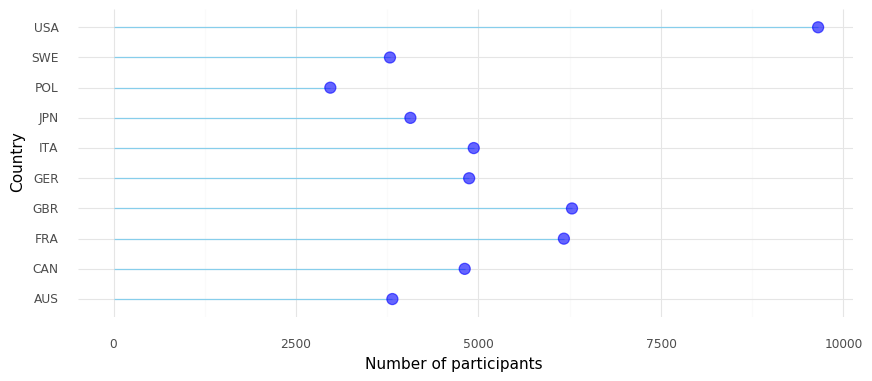

<ggplot: (7554767209)>

In [43]:
plot_num_participants(df_all)

The United States has highest number of athletes participated in the Olympics games, followed by the United Kingdom and France. 

#### Height and weight distributions

After having the information about the countries that have the highest participants, we also want to know about the stastical information of the height and weight of all participants in each countries presented above. 

In [44]:
def plot_violin_comparison_by_sex(df_main, variable, top_n = 10):
    # Get top n countries
    top_countries = get_top_n_countries_by_participants(df_main, top_n)["NOC"]
    
    # Get the dataframe of height of all atheletes for countries above
    df_var = (df_main
     .query("NOC in @top_countries")
     .filter(["NOC", variable, "Sex"])
    )

    # Drop all NaN data in Height column
    df_var = df_var[np.isfinite(df_var[variable])]
    
    # Make figure
    fig_var = (
        ggplot(df_var) +
        aes(fill = "Sex", y = variable, x = "factor(NOC)")+ 
        geom_violin(position = 'dodge') +
        scale_fill_manual(values = {"F": "plum", "M": "skyblue"}, breaks = ("F", "M"), labels = ("Female", "Male")) +
        labs(x = "Country", y = variable + " of participants")
    )
    
    return(fig_var + theme_minimal() + theme(figure_size = (10, 6)))

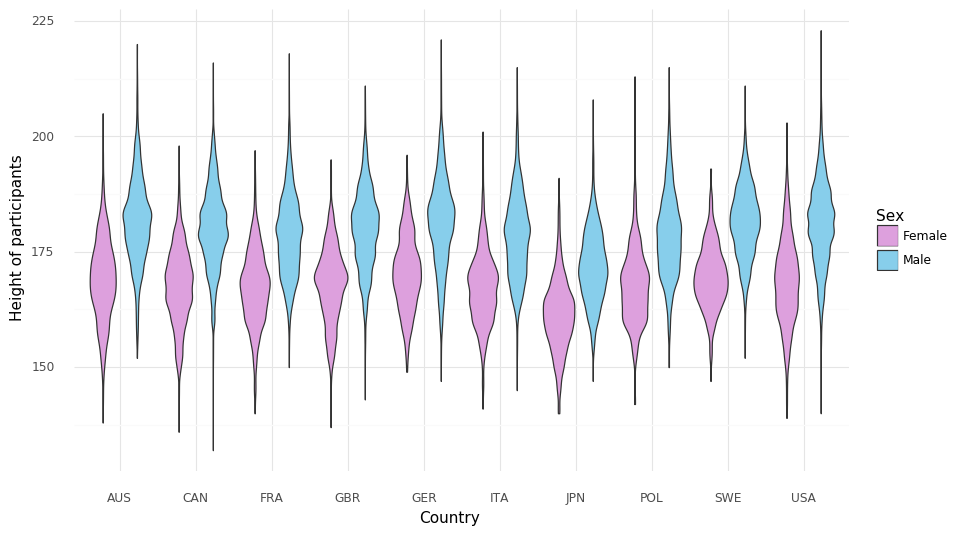

<ggplot: (7555358945)>

In [45]:
plot_violin_comparison_by_sex(df_all, "Height")

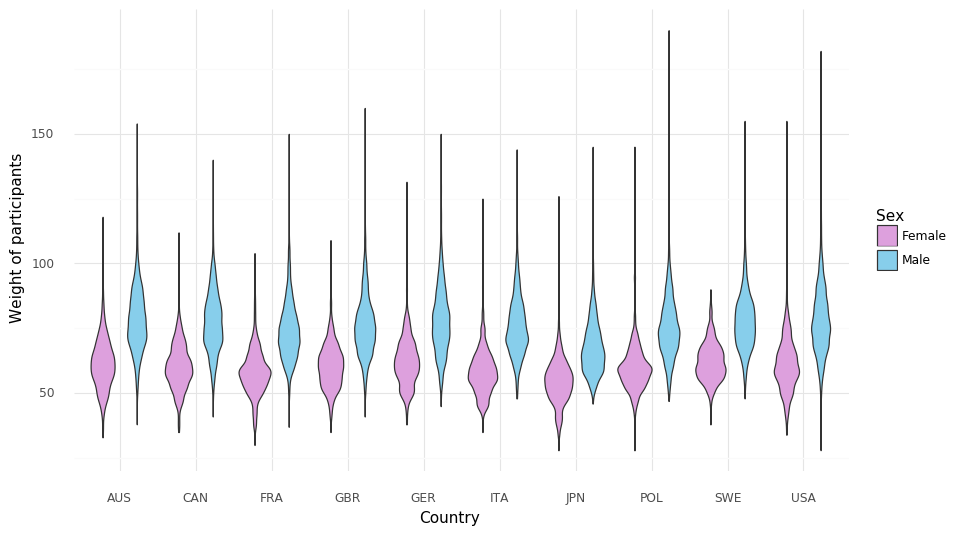

<ggplot: (7555358961)>

In [46]:
plot_violin_comparison_by_sex(df_all, "Weight")

As we can see, there is a clear pattern of males being heavier and taller regardless of the country. The median of height of male athletes from the US and Germany are the highest among others, while Australia is leading in the height of female athletes. 
For the weight, the median of weight for the ten countries with the highest number of participants are similar, except there are some female athelets from the US that extremely higher in weight comparison to the majority of others, as shown in the violin plot. 

### Number of medals

#### Countries with the most medals

As in the previous section, we need an auxiliary function for selecting an arbitrary number of top `N` countries by medal count. This function will be used in the plots of this section.

In [47]:
def get_top_n_countries_by_medals(df_main, season, top_n = 10):
    # Get the dataframe of countries with the highest number of medals 
    num_medals = (df_main
        .query('Medal.notna()')
        .query('Season == @season')
        .filter(["Year", "NOC", "Medal", "Event"])
        .drop_duplicates()
        .groupby(["NOC", "Medal"], as_index = False)
        .agg({"Event": "count"})
    )
    
    # Get the dataframe of twenty first countries with the highest number of medals
    num_medals = (num_medals 
        .pivot_table(
            index = "NOC", 
            columns = "Medal", 
            values = "Event", 
            fill_value = 0
        )
         .reset_index(level = 'NOC')
         .assign(Total = lambda x: x['Bronze'] + x['Gold'] + x['Silver'])
         .sort_values(by = 'Total', ascending = False)
         .head(top_n)
    )
    
    num_medals.NOC = pd.Categorical(
        num_medals.NOC, 
        categories = num_medals.NOC.tolist()
    )
    
    return(num_medals)

In [48]:
get_top_n_countries_by_medals(df_all, "Summer", 10)

Medal,NOC,Bronze,Gold,Silver,Total
139,USA,707,1035,802,2544
137,URS,294,394,317,1005
46,GBR,298,278,316,892
49,GER,282,233,261,776
43,FRA,282,233,255,770
67,ITA,198,219,191,608
22,CHN,153,227,162,542
121,SWE,188,150,175,513
6,AUS,192,147,167,506
57,HUN,172,178,154,504


In [49]:
def plot_num_medals(df_main, season, top_n = 10):
    # Get top countries by medal count
    num_medals = get_top_n_countries_by_medals(df_main, season, top_n)
    
    # Create the plot for the dataframe above
    fig_medals = (
        ggplot(num_medals) +
        aes(x = "NOC", y = "Total") +
        geom_segment(aes(xend = "NOC", yend = 0), color = "grey") +
        geom_point(size = 5, color = "orange") +
        scale_y_continuous(breaks = np.arange(0, 3000, 250)) +
        labs(x = "Country", y = "Total Medals")
    )
    
    return(fig_medals + theme_minimal() + theme(figure_size = (10, 5)))

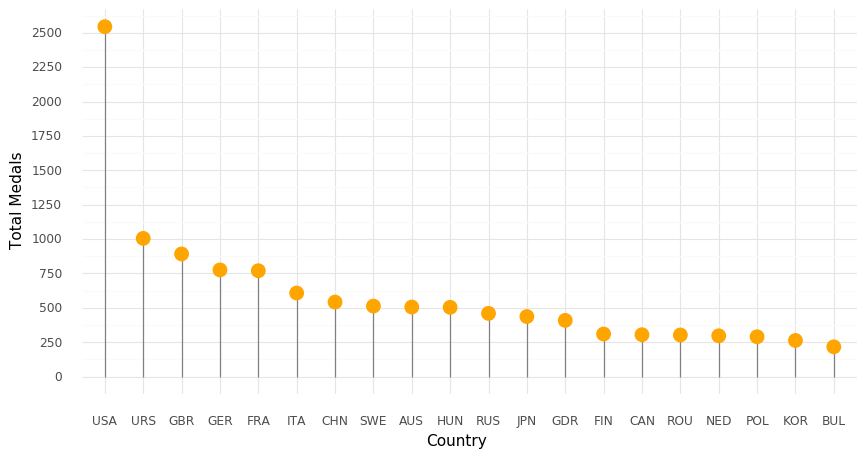

<ggplot: (7551149937)>

In [50]:
plot_num_medals(df_all, "Summer", 20)

Beside having the higest number of participants in the Olympic Games, the United States also successfully has become a country that obtained the highest number of medals.

#### Medal count per country

Using the function below, we can visualize the evolution of how many medals a particular country has got over time for either Summer or Winter games. 

In [51]:
def get_list_medals(df_main, country_init, season):
    df = (
        df_main
        .query('Medal.notna()')
        .query('Season == @season')
        .query('NOC == @country_init')
        .filter(["Year", "Medal", "Event"])
        .drop_duplicates()
        .groupby(["Year", "Medal"], as_index = False)
        .agg({"Event": "count"})
    )
    
    df["Year"] = pd.to_datetime(df["Year"], format = '%Y')
    
    return df

In [52]:
def plot_list_medals(df_main, country_init, season):
    medals = get_list_medals(df_main, country_init, season)
    fig = (
        ggplot(medals) +
        aes(x = "Year", y = "Event", fill = "Medal", color = "Medal") +
        geom_line() +
        geom_point(color = "black", size = 5) +
        scale_color_manual(values = {"Bronze": "peru", "Gold": "gold", "Silver" : "silver"}) +
        scale_fill_manual(values = {"Bronze": "peru", "Gold": "gold", "Silver" : "silver"}) +
        scale_y_continuous(#breaks = np.arange(5,100,5), 
                           #minor_breaks = 4, 
                           limits = [0, None]) + 
        scale_x_datetime(date_labels = "%Y", 
                         date_breaks = "4 year", 
                         expand = [0.02, 0]) +
        labs(x = "", y = "Medal count", title = "Medals earned by " + country_init + " in " + season + " Games")
    )
    return(fig + theme(figure_size = (12, 6), panel_spacing_y = 0.45, axis_text_x = element_text(angle = 45, hjust = 10)) )

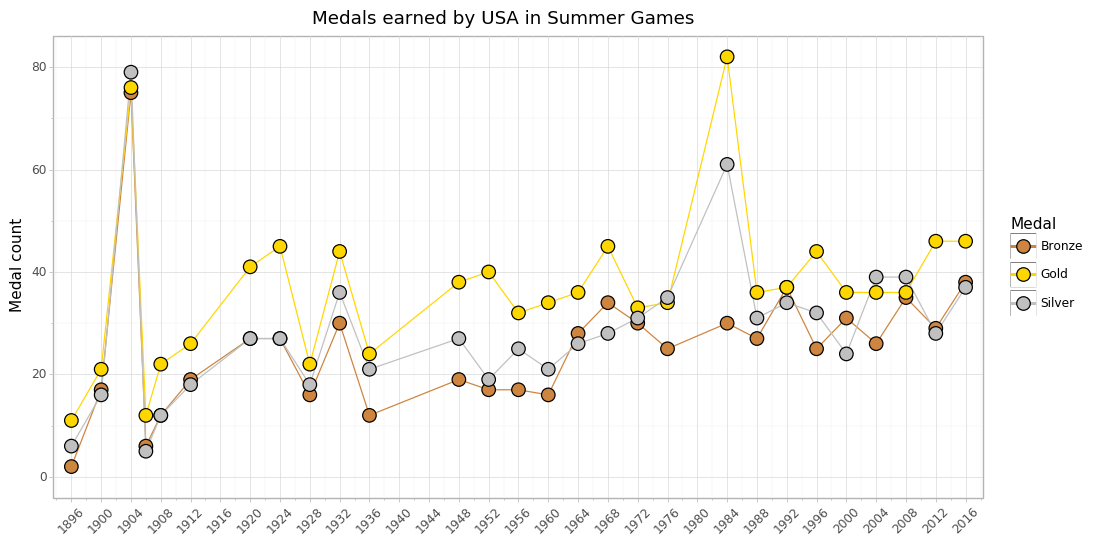

<ggplot: (7548760621)>

In [53]:
plot_list_medals(df_all, "USA", "Summer")

A very interesting fact is that the 1904 and 1984 Summer Games result in a clear peak of medalists in the USA history. This is because these games were held in St. Louis, MO and Los Angeles, CA respectively. 

The same pattern is probably true for most countries. As an example, we will use Spain and we should expect a peak in 1992, as the Summer Games were held in Barcelona.

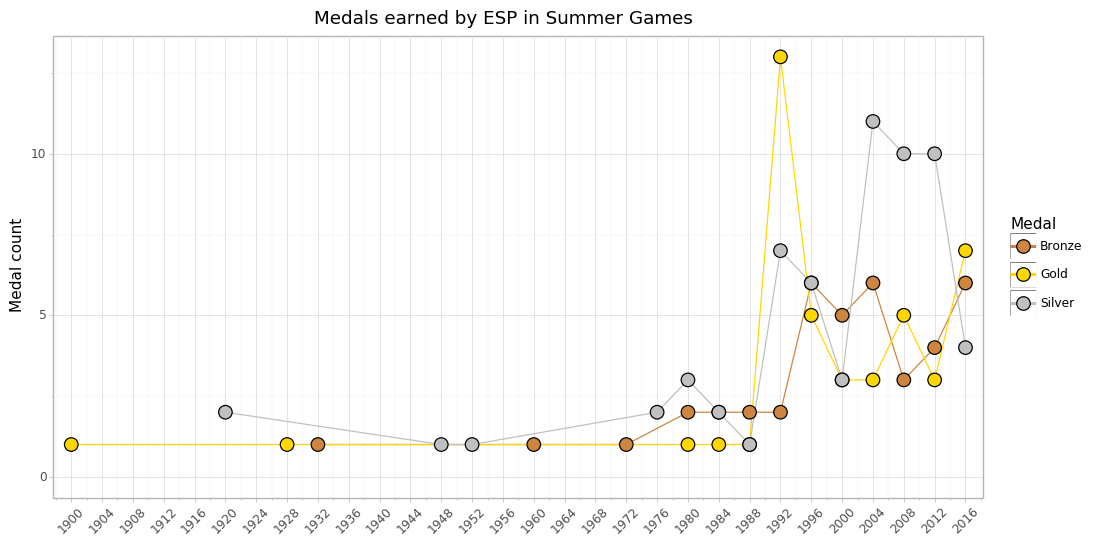

<ggplot: (7550847045)>

In [54]:
plot_list_medals(df_all, "ESP", "Summer")

#### Countries with medals in the highest number of sports

In this section, we are going to show the number of sports that the countries with the highest number of participants get involved.

In [55]:
def get_high_medal_sports_df(df_main, top_n = 10):
    top_countries = get_top_n_countries_by_participants(df_main, top_n)["NOC"]
    # Get the dataframe of number of sport that the countries above participate
    df_sports_highest_medals = (
        df_main
            .query("NOC in @top_countries")
            .filter(["NOC", "Sport"])
            .drop_duplicates()
            .groupby(["NOC"], as_index = False)
            .agg({"Sport": "count"})
            .transpose()
    )

    df_sports_highest_medals = df_sports_highest_medals[1:].rename(columns = df_sports_highest_medals.iloc[0])
    
    return(df_sports_highest_medals)

In [56]:
get_high_medal_sports_df(df_all)

,AUS,CAN,FRA,GBR,GER,ITA,JPN,POL,SWE,USA
Sport,51,53,57,59,53,52,52,45,47,58


In [57]:
def plot_high_medal_sports(df_main, top_n = 10):
    # Number of variables
    df_sports_highest_medals = get_high_medal_sports_df(df_main, top_n)
    
    categories = list(df_sports_highest_medals)[0:]
    N = len(categories)
    
    df_sports_highest_medals.index = [0]

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = df_sports_highest_medals.loc[0].values.flatten().tolist()
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    spider_plot = plt.subplot(111, polar = True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color = "grey", size = 15)

    # Draw ylabels
    spider_plot.set_rlabel_position(0)
    plt.yticks([10, 20, 30, 40, 50, 60], ["10", "20", "30", "40", "50", "60"], color = "brown", size = 8)
    plt.ylim(0, 60)
    
    # Set plot style and size
    plt.style.use("bmh")
    plt.rcParams.update({
        "figure.figsize" : (8, 8),
        "axes.facecolor" : "white",
        "axes.edgecolor":  "grey"
    })

    # Plot data
    spider_plot.plot(angles, values, linewidth = 1, linestyle = 'solid', color = "brown")

    # Fill area
    spider_plot.fill(angles, values, 'salmon', alpha = 0.2)

    # Face color     
    spider_plot.set_facecolor("w")

    return spider_plot

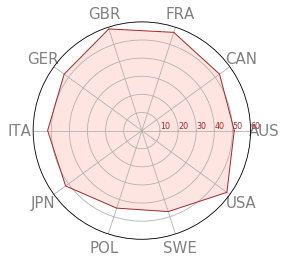

In [58]:
plot_high_medal_sports(df_all)

The number of sports that the UK and the US particiapted are greater than any other countries.

## Patterns and models (further analysis)

In this part, we will focus on analysing patterns in the data for a particular given sport. So first of all, we will get a complete list of the Olympic sports.

In [59]:
sport_list = (df_all 
    .Sport
    .unique()
)

In [60]:
sport_list

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

### Correlation analysis

In this section, depending on the kind of sport we choose, we can visually get information of the behavior between continous variables through pairplot below. 

In [61]:
# Define a function to get the pairplot
# The default plot is regression, we can choose another option, e.g. Scatter
def get_corr_plot(df_main, sport, target_hue, pairplot_type = "reg"):
    # Get data frame
    df = (df_main
        .query('Sport == @sport')
        .filter(["Sex", "Age", "Height", "Weight", " Year", "Medal", "Season"])
        .drop_duplicates()
    )
    
    # Make plot
    sns.pairplot(df, 
        x_vars = ["Age", "Weight", "Height"], 
        y_vars = ["Age", "Weight", "Height"], 
        kind = pairplot_type, hue = target_hue, palette = "Set2"
    )
    
    return(plt.show())

As an example, we can see how the relationship among age, weight, and height of athletes in basketball.

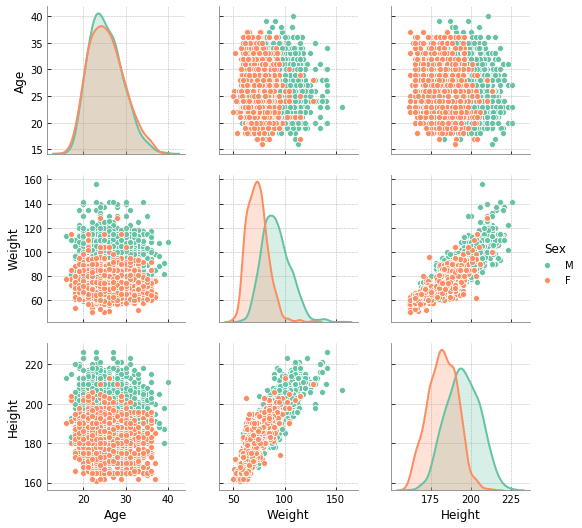

In [62]:
get_corr_plot(df_all, "Basketball", "Sex", pairplot_type = "scatter")

An interesting information can be seen from the figure above, where female athletes for basketballs are normally shorter and lighter than male athletes. However, there is no much difference in the distribution of age.

While from the figure below, there is no clear pattern of the relationship among height, weight, and age in favor of what kind of medals one can get.

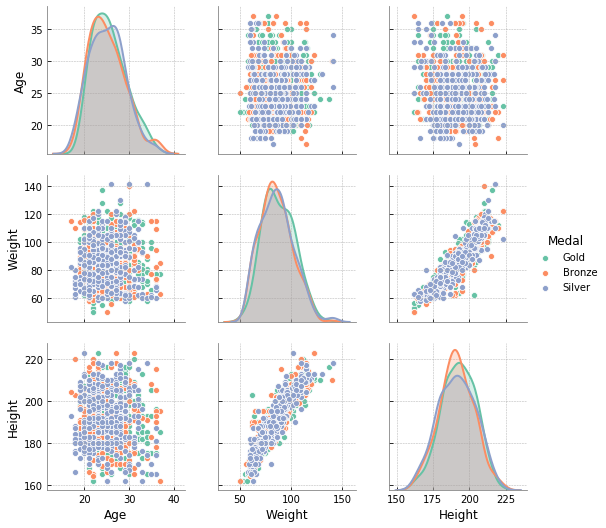

In [63]:
get_corr_plot(df_all, "Basketball", "Medal", pairplot_type = "scatter")

### Random forest

The purpose of the Random Forest analysis is to explore the feature/variable importance in order to determine which medal would an athlete win.

#### Data preprocessing

Before building the Random Forest model, it is necessary to pre-process the data, using data encoding techniques. 

We have two custom functions to encode the desired features of the dataframe in-place:

- One-hot encoding
- Factorisation

For the purposes of our Random Forest, we've used only factorisation, as it doesn't generate new features. This will allow for a better intepretation of the feature importance.

In [64]:
def factor_encode(original_dataframe, features_to_encode):
    df_untouched = original_dataframe.drop(features_to_encode, axis = 1)
    df_to_factor = original_dataframe.filter(features_to_encode)
    df_to_factor = df_to_factor.apply(lambda x: pd.factorize(x)[0])
    
    res = pd.concat([df_untouched, df_to_factor], axis = 1)
    return(res)

In [65]:
def onehot_encode(original_dataframe, features_to_encode):
    res = original_dataframe
    for feature in features_to_encode:
        dummies = pd.get_dummies(original_dataframe[[feature]])
        res = pd.concat([res, dummies], axis = 1)
        res = res.drop([feature], axis = 1)
    return(res)

#### Model construction

In [66]:
def split_dataset(df_main, train_split = 0.8):
    df_rf = df_main.copy()
    df_rf['is_train'] = np.random.uniform(0, 1, len(df_rf)) <= train_split
    train = df_rf[df_rf['is_train'] == True]
    test = df_rf[df_rf['is_train'] == False]
    
    train = train.drop("is_train", 1)
    test = test.drop("is_train", 1)
    
    return(train, test)

In [67]:
def perform_random_forest_classification(df_main, sport_filter, target = "Medal", train_split = 0.8, num_estimators = 500):
    df_random_forest = (df_main
        .query('Sport == @sport_filter')
        .filter(["Sex", "Age", "Height", "Weight", "NOC", "Season", "Year", "Event", "Medal"])
    )
    
    # For debugging purposes and figuring out the data type of the features
    # df_random_forest.info()
    
    # Features by data type
    categorical_cols = ["Sex", "Season", "Medal", "NOC", "Event"]
    multilabel_cols = [] # In case we did OHE
    numeric_cols = ["Age", "Height", "Weight", "Year"]
    
    # Encode features and target column
    df_random_forest = factor_encode(df_random_forest, categorical_cols)
    df_random_forest = onehot_encode(df_random_forest, multilabel_cols)
    
    # Getting rid of NaN values 
    # An alternative would be using data inputation techniques
    df_random_forest = df_random_forest.dropna()
    
    # Dataset split for training/test
    train, test = split_dataset(df_random_forest, train_split)
    
    # Select features and target for rd classifier
    features = df_random_forest.columns[...].drop(target)
    y = train[target].array
    
    # Random Forest classifier
    rnd_clf = RandomForestClassifier(n_estimators = num_estimators, n_jobs = 2, random_state = 0)
    rnd_clf.fit(train[features], y)
    
    return(rnd_clf, features)

In [68]:
random_forest_classifier, features = perform_random_forest_classification(
    df_main = df_all, 
    sport_filter = "Athletics", 
    target = "Medal", 
    train_split = 1, 
    num_estimators = 500
)

Notice that since we don't want to make predictions, we've used the whole dataset for training the model.

In [69]:
random_forest_classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Visualizing the model

Last but not least, we can visualize the top `N` most important features on our Random Forest classifier. An important thing to take into account here is that the importance plot doesn't tell how the variables influence the outcome, just that they have an important role on explaining the outcome of our target variable (`Medal`).

In [70]:
def plot_features_importance(clf, features, top_n = 8):
    importances = clf.feature_importances_
    indices = np.argsort(importances)
    
    importance_df = pd.DataFrame({
        'importance': importances[indices],
        'feature': [features[i] for i in indices]
    })
    
    importance_df = (
        importance_df
        .sort_values(by = 'importance', ascending = True)
        .tail(top_n)
    )
    
    importance_df.feature = pd.Categorical(
        importance_df.feature, 
        categories = importance_df.feature.tolist()
    )
    
    fig = (
        ggplot(importance_df) +
        aes(x = "feature", y = "importance") +
        geom_col(fill = "mediumaquamarine") +
        labs(x = "Feature", y = "Relative importance") +
        coord_flip()
    )
    
    return(fig)

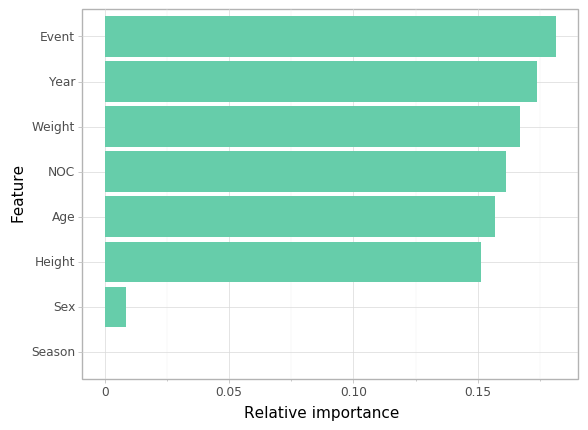

<ggplot: (7553485093)>

In [71]:
plot_features_importance(random_forest_classifier, features)

The type of event is the most important feature in what kind of medals one can get in Athletics sport, followed by the Year. It may be due to a certain level of difficulty of a sport event itself, and some of event did not happen every year. Weight contributes also in what kind of medal one athlete, followed by the origin country of the athlete. The variable that do not influence in type of medal one can achieve is Season, which make sense, since this type of sport is only for summer game, there is no Athletics in winter games.

## Summary

We have done several steps of exploratory data analysis, and behaviour of each variable and among them have been analysed to have meaningful information. 
Lastly, we also analysed the feature importance of each variable on what type of medal one athlete can get. Depending on the kind of sport, the feature importance could be different.

## Future studies

There are some interesting studies we can do in the future after getting know the data through EDA we had:
    
- Time series analysis and prediction on how many medals a country can get based on the historical data.
- Machine learning model to predict what kind of medal one athlete could possible get.